In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_excel("superstore_sales.xlsx")

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [ ]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [ ]:
df['country'].value_counts().reset_index()

,index,country
0,United States,9994
1,Australia,2837
2,France,2827
3,Mexico,2644
4,Germany,2065
5,China,1880
6,United Kingdom,1633
7,Brazil,1599
8,India,1555
9,Indonesia,1390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [ ]:
# Check missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [ ]:
# Getting descriptive statistics summary
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


#**Data Analysis**

**What is the overall sales trend?**

In [ ]:
df['Month Year'] = df['order_date'].apply(lambda x:x.strftime('%Y-%m'))
df['Month Year']

In [ ]:
df_trend = df.groupby('Month Year').sum()['sales'].reset_index()
df_trend.head()

<ipython-input-74-a8d56758c3a9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_trend = df.groupby('Month Year').sum()['sales'].reset_index()


,Month Year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610


In [ ]:
df_trend['Month Year'] = df_trend['Month Year'].dt.to_timestamp()

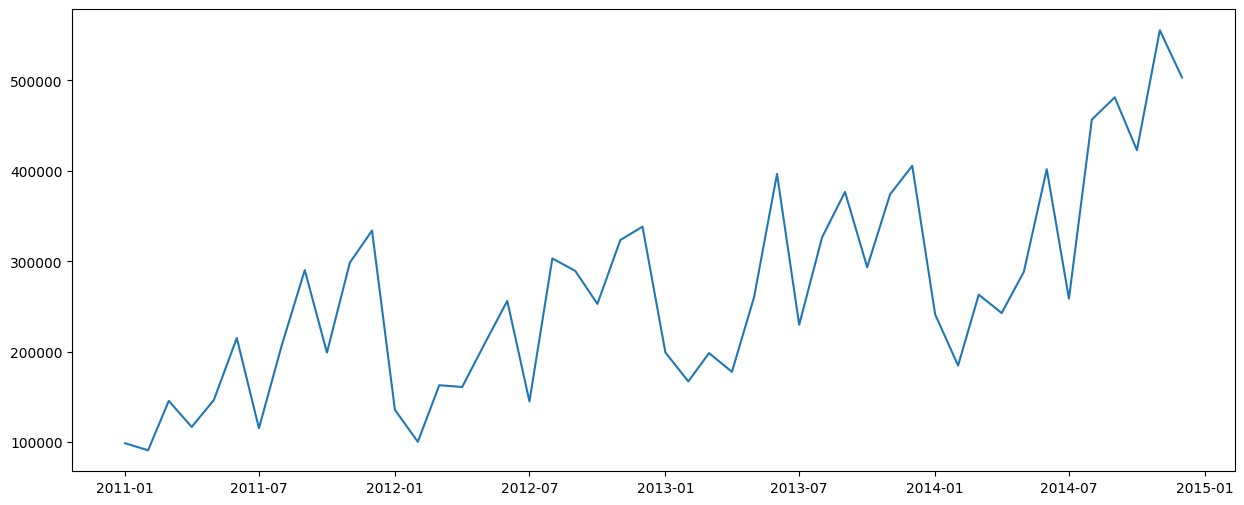

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df_trend['Month Year'], df_trend['sales'])

<Axes: xlabel='Month Year', ylabel='sales'>

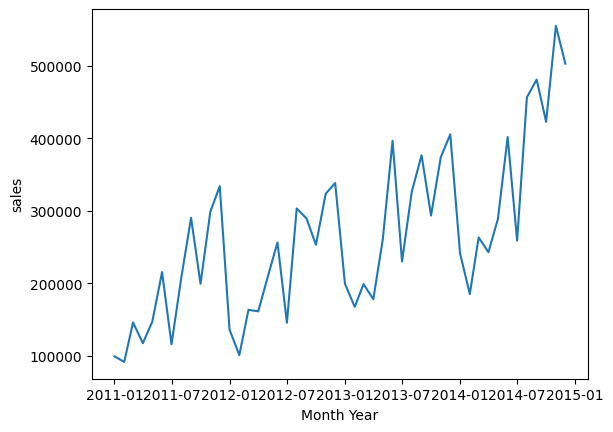

In [ ]:
sns.lineplot(x='Month Year', y='sales', data = df_trend)

**Which are the top 10 products by sales**

In [ ]:
top_prod_sales = df.groupby('product_name').sum()['sales'].reset_index()
top_prod_sales.sort_values('sales' , ascending = False).head(10)

<ipython-input-61-3e66233508b7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_prod_sales = df.groupby('product_name').sum()['sales'].reset_index()


,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


**Which are the most selling products**

In [ ]:
most_sell_product = df.groupby('product_name').sum()['quantity'].reset_index()
top_qty = most_sell_product.sort_values('quantity', ascending = False).head()
top_qty

<ipython-input-69-24bc34db78f3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_sell_product = df.groupby('product_name').sum()['quantity'].reset_index()


,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259


In [ ]:
other_quantity = most_sell_product.iloc[5:]['quantity'].sum()
other_quantity

178214

In [ ]:
plot_data = pd.concat([top_qty, pd.DataFrame({'product_name': ['Others'], 'quantity': [other_quantity]})])
plot_data

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
0,Others,178214


**What is the most preferred ship mode?**

<Axes: xlabel='count', ylabel='ship_mode'>

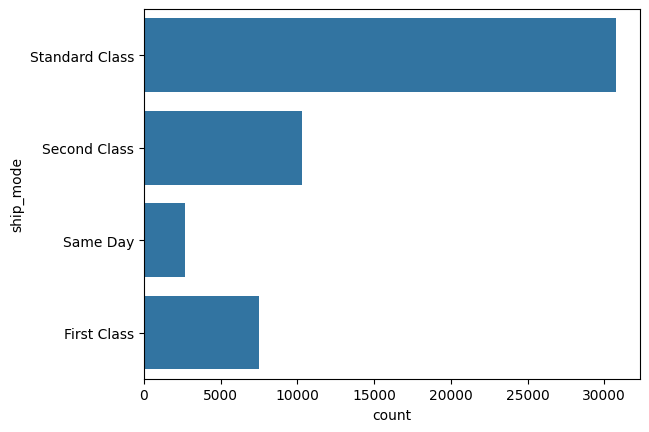

In [ ]:
sns.countplot(df['ship_mode'])

**Which are the most profitable category and sub-category?**

In [ ]:
cat_sub = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])
cat_sub.sort_values(['category','profit'], ascending = False)

<ipython-input-89-64c3e9edb64c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_sub = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])


profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

**Negara dengan profit terbesar**

In [ ]:
pf_c = df.groupby('country').sum()['profit'].round(3).sort_values(ascending = False)
profitable_country = gpd.GeoDataFrame(pf_c.head(5).reset_index())
profitable_country

<ipython-input-80-d1f02db6c05c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pf_c = df.groupby('country').sum()['profit'].round(3).sort_values(ascending = False)


,country,profit
0,United States,286397.022
1,China,150683.085
2,India,129071.835
3,United Kingdom,111900.150
4,France,109029.003


**US Profit**

In [ ]:
df[df['country'] == 'United States'].shape

(9994, 21)

In [ ]:
us_states = df[df['country'] == 'United States']
profit_us = us_states.groupby('state').sum()['profit']
profit_us.reset_index()

<ipython-input-46-3e16a72c8e8f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_us = us_states.groupby('state').sum()['profit']


,state,profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579
5,Connecticut,3511.4918
6,Delaware,9977.3748
7,District of Columbia,1059.5893
8,Florida,-3399.3017
9,Georgia,16250.0433


**Segment Pelanggan terbanyak**

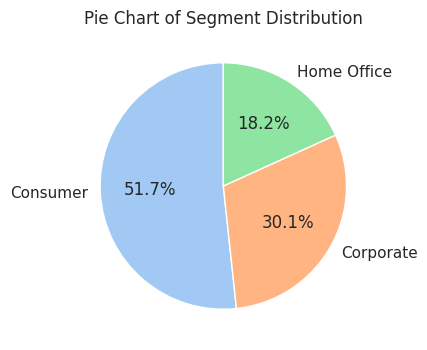

In [ ]:
segment_counts = df['segment'].value_counts(normalize=True) * 100

plt.figure(figsize=(4, 4))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%',startangle = 90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Segment Distribution')
plt.show()

**Korelasi prioritas pesanan dengan waktu mulai pengiriman dan biaya pengiriman**

In [ ]:
df['selisih_hari'] = (df['ship_date'] - df['order_date']).dt.days

In [ ]:
avg_op_time = pd.DataFrame(df.groupby('order_priority').mean()[['selisih_hari','shipping_cost']])
avg_op_time.rename(columns ={'selisih_hari':'AVG order procces', 'shipping_cost':'AVG ship fee'})

<ipython-input-71-0c883e42ce2d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_op_time = pd.DataFrame(df.groupby('order_priority').mean()[['selisih_hari','shipping_cost']])


,AVG order procces,AVG ship fee
order_priority,,
Critical,1.806205,59.721245
High,3.085801,32.871806
Low,6.484736,27.076355
Medium,4.516529,18.442320
